In [196]:
import warnings
import os
import gc
import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
warnings.filterwarnings("ignore")

In [224]:
train_X = pd.read_csv("./train.csv")
test_X = pd.read_csv("./testA.csv")

In [225]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

## 处理缺失值

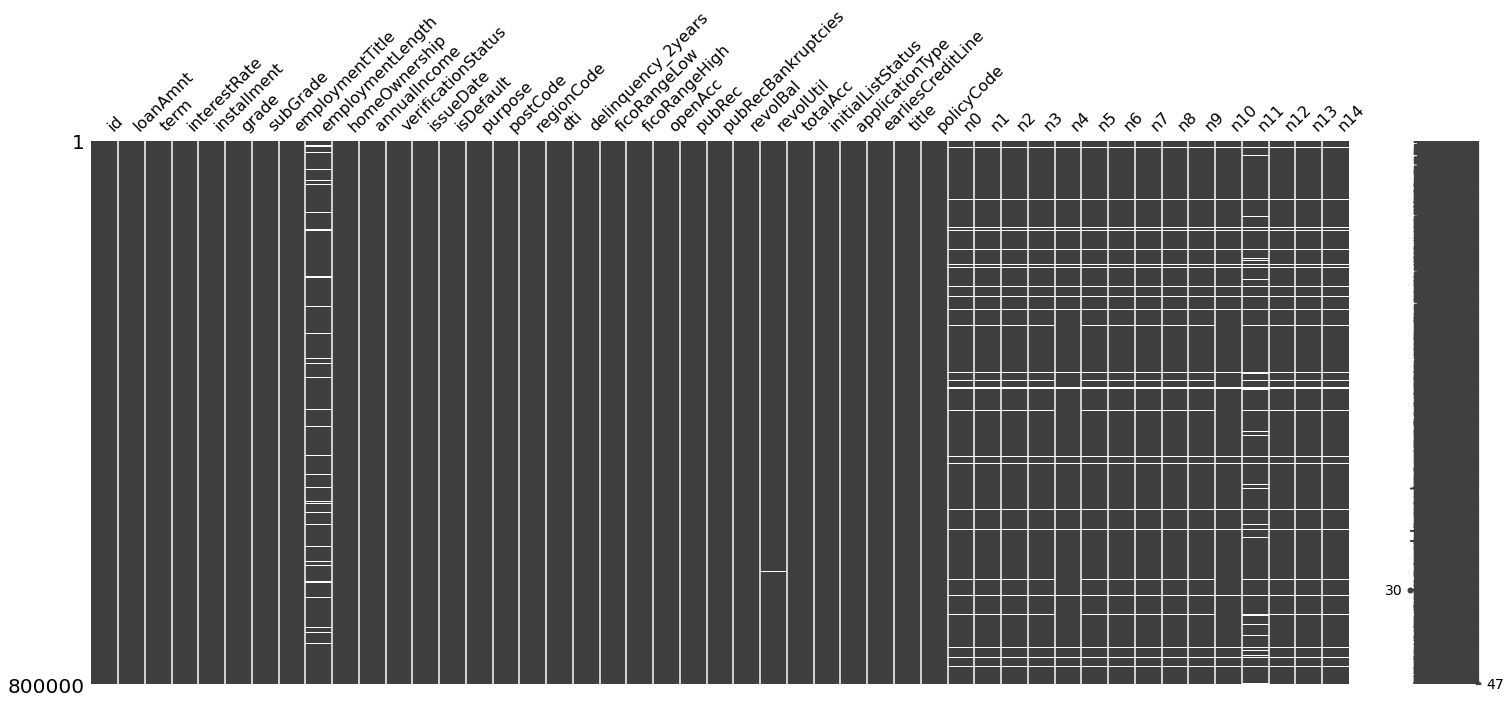

In [226]:
%run utils.ipynb
MissingDataPlot(train_X)

In [227]:
#含缺失值的列名
missing_cols = train_X.columns[train_X.isnull().sum() > 0].to_list()

In [228]:
missing_cols

['employmentTitle',
 'employmentLength',
 'postCode',
 'dti',
 'pubRecBankruptcies',
 'revolUtil',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [229]:
%run utils.ipynb

In [230]:
#根据employmentTitle的数据特性和数据分布，其缺失值可以采用众数填充更为合适

imputer = SimpleImputer(strategy='most_frequent')
train_X['employmentTitle'] = imputer.fit_transform(train_X[['employmentTitle']])
test_X['employmentTitle'] = imputer.transform(test_X[['employmentTitle']])

In [231]:
#根据postCode的数据特性和数据分布，其缺失值可以采用中位数填充

imputer = SimpleImputer(strategy='median')
train_X['postCode'] = imputer.fit_transform(train_X[['postCode']])
test_X['postCode'] = imputer.transform(test_X[['postCode']])

In [232]:
#根据dti的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='mean')
train_X['dti'] = imputer.fit_transform(train_X[['dti']])
test_X['dti'] = imputer.transform(test_X[['dti']])

In [233]:
#根据pubRecBankruptcies的数据特性和数据分布，其缺失值可以采用中位数填充

imputer = SimpleImputer(strategy='median')
train_X['pubRecBankruptcies'] = imputer.fit_transform(train_X[['pubRecBankruptcies']])
test_X['pubRecBankruptcies'] = imputer.transform(test_X[['pubRecBankruptcies']])

In [234]:
#根据revolUtil的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='mean')
train_X['revolUtil'] = imputer.fit_transform(train_X[['revolUtil']])
test_X['revolUtil'] = imputer.transform(test_X[['revolUtil']])

In [235]:
#根据revolUtil的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='most_frequent')
train_X['title'] = imputer.fit_transform(train_X[['title']])
test_X['title'] = imputer.transform(test_X[['title']])

In [236]:
#根据n0的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n0'] = imputer.fit_transform(train_X[['n0']])
test_X['n0'] = imputer.transform(test_X[['n0']])

In [237]:
#根据n1的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n1'] = imputer.fit_transform(train_X[['n1']])
test_X['n1'] = imputer.transform(test_X[['n1']])

In [238]:
#根据n2的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n2'] = imputer.fit_transform(train_X[['n2']])
test_X['n2'] = imputer.transform(test_X[['n2']])

In [239]:
#根据n3的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n3'] = imputer.fit_transform(train_X[['n3']])
test_X['n3'] = imputer.transform(test_X[['n3']])

In [240]:
#根据n4的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n4'] = imputer.fit_transform(train_X[['n4']])
test_X['n4'] = imputer.transform(test_X[['n4']])

In [241]:
#根据n5的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n5'] = imputer.fit_transform(train_X[['n5']])
test_X['n5'] = imputer.transform(test_X[['n5']])

In [242]:
#根据n6的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n6'] = imputer.fit_transform(train_X[['n6']])
test_X['n6'] = imputer.transform(test_X[['n6']])

In [243]:
#根据n7的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n7'] = imputer.fit_transform(train_X[['n7']])
test_X['n7'] = imputer.transform(test_X[['n7']])

In [244]:
#根据n8的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n8'] = imputer.fit_transform(train_X[['n8']])
test_X['n8'] = imputer.transform(test_X[['n8']])

In [245]:
#根据n9的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n9'] = imputer.fit_transform(train_X[['n9']])
test_X['n9'] = imputer.transform(test_X[['n9']])

In [246]:
#根据n10的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n10'] = imputer.fit_transform(train_X[['n10']])
test_X['n10'] = imputer.transform(test_X[['n10']])

In [247]:
#根据n11的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n11'] = imputer.fit_transform(train_X[['n11']])
test_X['n11'] = imputer.transform(test_X[['n11']])

In [248]:
#根据n12的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n12'] = imputer.fit_transform(train_X[['n12']])
test_X['n12'] = imputer.transform(test_X[['n12']])

In [249]:
#根据n13的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n13'] = imputer.fit_transform(train_X[['n13']])
test_X['n13'] = imputer.transform(test_X[['n13']])

In [250]:
#根据n14的数据特性和数据分布，其缺失值可以采用均值填充

imputer = SimpleImputer(strategy='median')
train_X['n14'] = imputer.fit_transform(train_X[['n14']])
test_X['n14'] = imputer.transform(test_X[['n14']])

In [251]:
#employmentLength 类型为object，先将其编码，再填充缺失值
label_enc = LabelEncoder()
train_X['employmentLength'] = label_enc.fit_transform(train_X[['employmentLength']])
test_X['employmentLength'] = label_enc.transform(test_X[['employmentLength']])


imputer = SimpleImputer(strategy='most_frequent')
train_X['employmentLength'] = imputer.fit_transform(train_X[['employmentLength']])
test_X['employmentLength'] = imputer.transform(test_X[['employmentLength']])

## 部分特征编码

### 先将object类型的特征进行编码

In [252]:
object_cols = train_X.columns[pd.Series(train_X.columns).apply(lambda x: True if train_X[x].dtype == 'object' else False)]
object_cols = list(object_cols)
object_cols

['grade', 'subGrade', 'issueDate', 'earliesCreditLine']

In [253]:
# 根据grade 和subGrade 的是数据类型，将其进行序列编码
label_enc = LabelEncoder()
for col in ['grade','subGrade']:
    train_X[col] = label_enc.fit_transform(train_X[[col]])
    test_X[col] = label_enc.transform(test_X[[col]])

In [259]:
#'issueDate', 'earliesCreditLine'属于日期类型特征，将其年月日提取出来

#earliesCreditLine
train_X['earliesCreditLine_year'] = pd.DatetimeIndex(train_X['earliesCreditLine']).year
train_X['earliesCreditLine_month'] = pd.DatetimeIndex(train_X['earliesCreditLine']).month
test_X['earliesCreditLine_year'] = pd.DatetimeIndex(test_X['earliesCreditLine']).year
test_X['earliesCreditLine_month'] = pd.DatetimeIndex(test_X['earliesCreditLine']).month

#issueDate
train_X['issueDate_year'] = pd.DatetimeIndex(train_X['issueDate']).year
train_X['issueDate_month'] = pd.DatetimeIndex(train_X['issueDate']).month
train_X['issueDate_day'] = pd.DatetimeIndex(train_X['issueDate']).day

test_X['issueDate_year'] = pd.DatetimeIndex(test_X['issueDate']).year
test_X['issueDate_month'] = pd.DatetimeIndex(test_X['issueDate']).month
test_X['issueDate_day'] = pd.DatetimeIndex(test_X['issueDate']).day

In [262]:
#将 处理好的object类型特征删除掉
for col in train_X.columns:
    if train_X[col].dtype == 'object':
        train_X.drop(labels = [col], axis = 1, inplace =True)
        test_X.drop(labels = [col], axis = 1, inplace =True)

### 其他category类型特征

<AxesSubplot:>

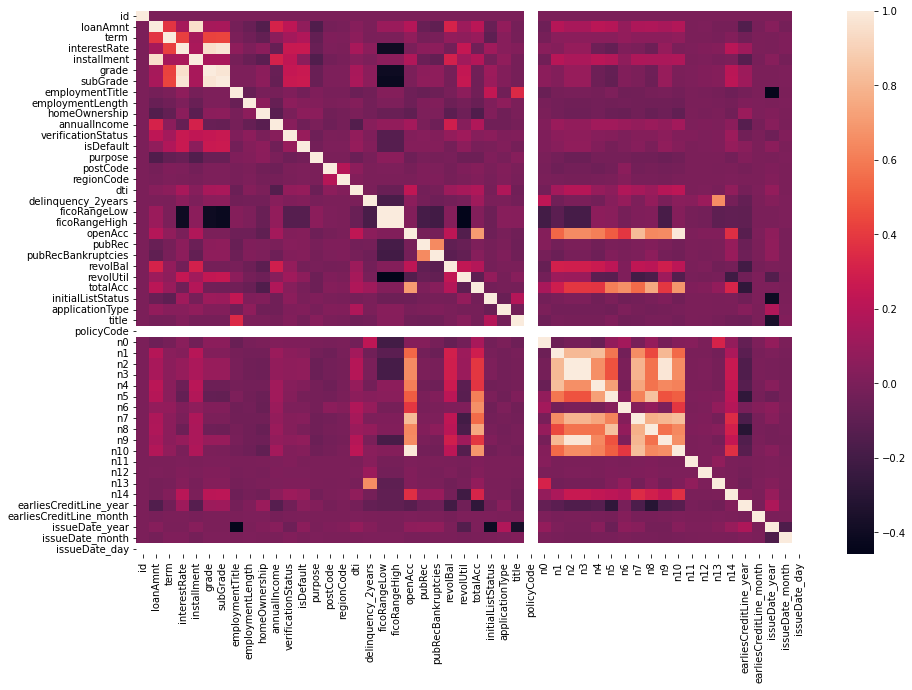

In [265]:
fig = plt.figure(figsize = (15, 10))
sns.heatmap(data = train_X.corr())

# 特征编码

In [275]:
#类别型特征
cate_cols = ['id','term','grade','subGrade','employmentTitle','employmentLength',
            'homeOwnership','verificationStatus','purpose','postCode','regionCode',
            'initialListStatus','applicationType','title','policyCode',
            'earliesCreditLine_year','earliesCreditLine_month','issueDate_year',
             'issueDate_month','issueDate_day']

In [276]:
#连续型特征
num_cols = [x for x in train_X.columns if x not in cate_cols]

In [280]:
#term
train_X['term'].value_counts()

3    606902
5    193098
Name: term, dtype: int64

In [281]:
#grade
train_X['grade'].value_counts()

1    233690
2    227118
0    139661
3    119453
4     55661
5     19053
6      5364
Name: grade, dtype: int64

In [282]:
#subGrade
train_X['subGrade'].value_counts()

10    50763
8     49516
9     48965
7     48600
11    47068
12    44751
13    44272
6     44227
5     42382
14    40264
4     38045
3     30928
15    30538
16    26528
0     25909
17    23410
2     22655
1     22124
18    21139
19    17838
20    14064
21    12746
22    10925
23     9273
24     8653
25     5925
26     4340
27     3577
28     2859
29     2352
30     1759
31     1231
32      978
33      751
34      645
Name: subGrade, dtype: int64

In [283]:
#employmentLength
train_X['employmentLength'].value_counts()

1     262753
2      72358
10     64237
3      64152
0      52489
5      50102
4      47985
11     46799
6      37254
8      36192
7      35407
9      30272
Name: employmentLength, dtype: int64

In [284]:
#employmentTitle
"""从数值结果看，employmentTitle属于高基数类别特征"""
train_X['employmentTitle'].value_counts()

54.0        51150
38.0        12644
32.0        11543
184.0        6112
151.0        5193
            ...  
56828.0         1
118913.0        1
208948.0        1
313793.0        1
134854.0        1
Name: employmentTitle, Length: 248683, dtype: int64

In [295]:
#对employmentTitle进行均值编码
temp_df = train_X[~train_X['isDefault'].isnull()].copy()
temp_label = train_X['isDefault']
mean_enc = MeanEncoder(['employmentTitle'])
train_X = mean_enc.fit_transform(temp_df,temp_label)
del temp_df,temp_label
gc.collect()

0

In [297]:
#homeOwnership
train_X['homeOwnership'].value_counts()

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

In [298]:
# verificationStatus
train_X['verificationStatus'].value_counts()

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

In [299]:
#purpose
train_X['purpose'].value_counts()

0     464096
4     175433
2      52129
5      46276
3      17579
9       9238
1       9106
8       8657
10      5652
7       5373
6       4354
12      1363
11       554
13       190
Name: purpose, dtype: int64

In [300]:
#postCode
train_X['postCode'].value_counts()

134.0    8956
19.0     8611
51.0     8161
31.0     7337
4.0      7176
         ... 
884.0       1
839.0       1
858.0       1
937.0       1
935.0       1
Name: postCode, Length: 932, dtype: int64

In [303]:
#可以先将postCode进行mean编码尝试一下
temp_df = train_X[~train_X['isDefault'].isnull()].copy()
temp_label = train_X['isDefault']
mean_enc = MeanEncoder(['postCode'])
train_X = mean_enc.fit_transform(temp_df,temp_label)
del temp_df, temp_label
gc.collect()

3916

In [304]:
#regionCode
train_X['regionCode'].value_counts()

8     116921
14     65768
13     65041
21     56671
2      30513
30     28634
0      27180
19     26198
3      25766
9      22902
7      22600
23     20919
10     19604
12     18543
26     18432
22     17722
18     17286
4      14177
11     12929
24     12776
32     12065
38     11982
36     11644
27     10521
17      9863
35      9669
5       9581
20      9124
43      7701
42      7267
15      6690
37      5998
45      5932
16      4325
28      4036
44      3963
33      3817
6       3496
39      2943
40      2287
31      2261
34      2136
25      2102
48      1880
41      1778
1       1624
29      1560
47      1213
49      1001
46       953
50         6
Name: regionCode, dtype: int64

In [ ]:
#类别型特征
cate_cols = ['id','term','grade','subGrade','employmentTitle','employmentLength',
            'homeOwnership','verificationStatus','purpose','postCode','regionCode',
            'initialListStatus','applicationType','title','policyCode',
            'earliesCreditLine_year','earliesCreditLine_month','issueDate_year',
             'issueDate_month','issueDate_day']